In [10]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
rtest = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')

In [11]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=123)
X = X.toarray()

X_test, y_test = load_svmlight_file(f=BytesIO(rtest.content), n_features=123)
X_test = X_test.toarray()

In [12]:
import numpy as np

# preprocess
n_samples, n_features = X.shape
X_train = np.column_stack((X, np.ones((n_samples, 1))))

X_test = np.column_stack((X_test, np.ones((X_test.shape[0], 1))))

y_train = y.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [78]:
learning_rate = 0.0005
max_epoch = 100
batch_size = 256
C = 0.8

losses_train = []
losses_val = []
val_acc = []

In [79]:
# select different initializing method
#w = np.zeros((n_features + 1, 1))  # initialize with zeros
w = np.random.random((n_features + 1, 1))  # initialize with random numbers
#w = np.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [80]:
def predict(data):
    return np.dot(data, w)

def getLoss(predict, label):
    loss = np.sum(w**2)/2
    loss1 = np.maximum(0,1-label*predict)
    loss1 = np.sum(loss1)
    loss = loss + C * loss1
    return loss

In [81]:
for epoch in range(max_epoch):
    
    # predict and get train loss
    pre = predict(X_train)
    loss_train = getLoss(pre, y_train)
    losses_train.append(loss_train)
    
    # predict and get test loss
    test_pre = predict(X_test)
    loss_val = getLoss(test_pre, y_test)
    losses_val.append(loss_val)
    
    # get test accuracy
    test_pre = np.where(test_pre>=0, 1, -1)
    acc = np.mean(test_pre==y_test)
    val_acc.append(acc)
    
    # update parameters
    choice_index = np.random.choice(n_samples, batch_size)
    selected_predict = pre[choice_index]
    selected_y = y_train[choice_index]
    selected_X = X_train[choice_index]
    
    sub_g = np.where(1-selected_y*selected_predict>=0, -selected_y*selected_X, 0)
    G = np.sum(sub_g, axis=0)*C # calculate the gradient
    G = G.reshape(-1,1)
    w_copy = np.copy(w)
    w_copy[-1] = 0
    G += w_copy
    G = -G
    w += learning_rate * G  # update the parameters


In [82]:
print(val_acc)

[0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.23622627602727106, 0.2368404889134574, 0.2377003869541183, 0.2448866777224986, 0.27357041950740124, 0.3399054112155273, 0.42528100239543026, 0.5136662367176463, 0.5694981880719857, 0.6176524783489957, 0.6410539893126957, 0.6653768196056753, 0.6877955899514772, 0.6961488852036116, 0.7075118235980591, 0.7136539524599226, 0.7172163871998034, 0.7173392297770407, 0.7220686690006757, 0.7222529328665316, 0.7282107978625392, 0.7311590197162336, 0.7291935384804373, 0.7304833855414287, 0.7347828757447331, 0.7364412505374363, 0.7361955653829617, 0.738836680793563, 0.7392052085252748, 0.7432590135741047, 0.7452859160985198, 0.7457772864074689, 0.7468828696026043, 0.7502610404766292, 0.7514894662490019, 0.7521036791351883, 0.7532706836189423, 0.7556046925864505, 0.7575087525336281, 0.759044284749094, 0.7600884466556108, 0.75928996

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

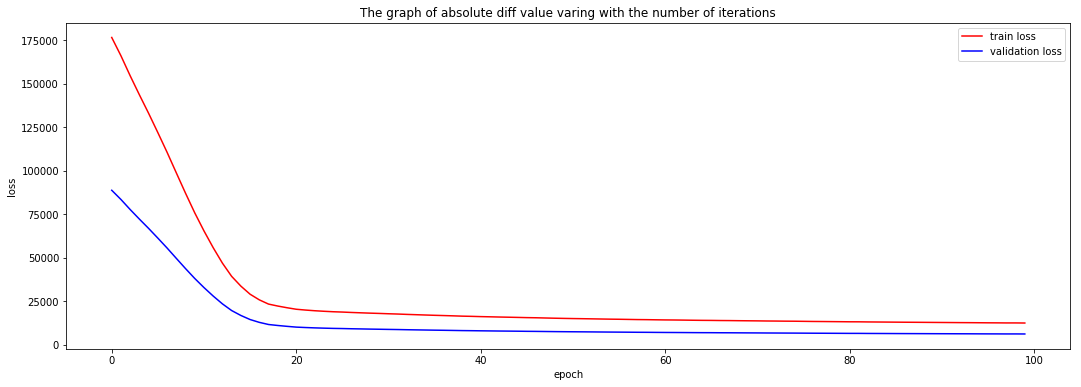

In [83]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

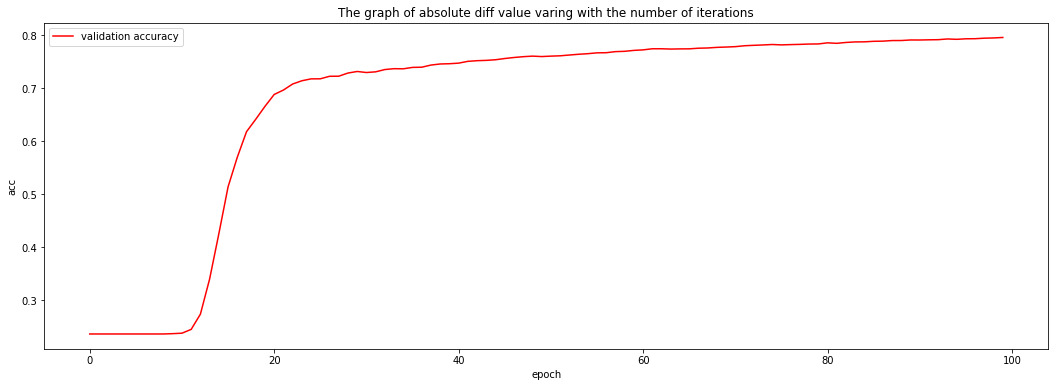

In [84]:
%matplotlib inline

plt.figure(figsize=(18, 6))
plt.plot(val_acc, "-", color="r", label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.title("The graph of test accuracy varing with the number of iterations")